# Classify audio effects on guitar samples

## 0. Import and config

In [6]:
import os
import time
import numpy as np
import pandas as pd
import scipy
import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib nbagg
import matplotlib.style as ms
ms.use('seaborn-muted')
import IPython.display as Ipd
import sklearn

In [21]:
# Setup variables
samplerate = 44100
sample_len = 2*samplerate
n_mfcc = 13
hop_len = 512
segment_len = int(np.ceil(sample_len/hop_len))
mfcc_len = segment_len * n_mfcc
spectral_bandwidth_len = segment_len
spectral_flatness_len = 1
feature_len = mfcc_len + spectral_bandwidth_len + spectral_flatness_len
print(feature_len)

2423


## 1. Import and prepare data

In [22]:
#get audio files
fileswchorus = os.listdir('./DataSet/Samples/Chorus')
fileswdistortion = os.listdir('./DataSet/Samples/Distortion')
filesweq = os.listdir('./DataSet/Samples/EQ')
fileswdelay = os.listdir('./DataSet/Samples/FeedbackDelay')
fileswflanger = os.listdir('./DataSet/Samples/Flanger')
fileswnofx = os.listdir('./DataSet/Samples/NoFX')

#calc number of samples
n_data = len(fileswchorus)+len(fileswdistortion)+len(filesweq)+len(fileswdelay)+len(fileswflanger)+len(fileswnofx)
print("Number of samples: %i" % n_data)

#setup classes
labels = np.zeros(n_data)
features = np.zeros((n_data, feature_len))
classes = ['Chorus','Distortion','EQ','FeedbackDelay','Flanger','NoFX']

Number of samples: 9360


## 2.a Extract features

In [28]:
from IPython.display import clear_output
start_time = time.time()
count = 0

def extract_features(filename, count=0):
    signal, dummy = librosa.load(filename, samplerate, mono=True)
    mfccs = librosa.feature.mfcc(signal, samplerate, n_mfcc=n_mfcc, hop_length=hop_len).flatten()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(signal, samplerate).flatten()
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(signal).flatten())
    output = np.append(np.concatenate((mfccs, spectral_bandwidth)),spectral_flatness)
    clear_output(wait=True)
    print("%i/%i samples processed" % (count, n_data))
    return output
    
idx = 0
    
for x in fileswchorus:
    count = count+1
    output = extract_features('./DataSet/Samples/Chorus/' + x, count)
    features[idx,:] = output
    labels[idx] = 0
    idx = idx+1
    
for x in fileswdistortion:
    count = count+1
    output = extract_features('./DataSet/Samples/Distortion/' + x, count)
    features[idx,:] = output
    labels[idx] = 1
    idx = idx+1    
        
for x in filesweq:
    count = count+1
    output = extract_features('./DataSet/Samples/EQ/' + x, count)
    features[idx,:] = output
    labels[idx] = 2
    idx = idx+1    
    
for x in fileswdelay:
    count = count+1
    output = extract_features('./DataSet/Samples/FeedbackDelay/' + x, count)
    features[idx,:] = output
    labels[idx] = 3
    idx = idx+1    

for x in fileswflanger:
    count = count+1
    output = extract_features('./DataSet/Samples/Flanger/' + x, count)
    features[idx,:] = output
    labels[idx] = 4
    idx = idx+1    

for x in fileswnofx:
    count = count+1
    output = extract_features('./DataSet/Samples/NoFX/' + x, count)
    features[idx,:] = output
    labels[idx] = 5
    idx = idx+1    

print("Feature extraction done")
print("Took %d seconds" % (time.time() - start_time))

9360/9360 samples processed
Feature extraction done
Took 400 seconds


In [29]:
labels = pd.DataFrame(labels)
labels.columns = ['labels']
labels = labels['labels']

### Save features to .csv

In [6]:
dataset = pd.DataFrame(features)
column_names = []
for c in range(feature_len):
    column_names.append("Feat %i" % c)
dataset.columns =  column_names
dataset['label digit'] = labels
label_text = []
for l in labels:
    label_text.append(classes[int(l)])
dataset['label text'] = label_text
dataset.to_csv('features.csv')
dataset

,Feat 0,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 1123,Feat 1124,Feat 1125,Feat 1126,Feat 1127,Feat 1128,Feat 1129,Feat 1130,label digit,label text
0,-784.702332,-784.702332,-784.702332,-783.191589,-780.561096,-780.741699,-779.379578,-780.059937,-780.545044,-779.264648,...,-9.980167,-9.575130,-11.077902,-10.313608,-9.547455,-8.738466,-9.587674,-6.503111,0.0,Chorus
1,-761.046631,-761.046631,-761.046631,-760.790771,-758.623718,-758.156921,-756.930786,-757.317566,-757.418396,-756.323364,...,-11.614445,-10.615732,-10.760288,-10.884594,-8.935947,-10.373097,-10.659937,-7.882442,0.0,Chorus
2,-755.930176,-755.930176,-755.930176,-755.882141,-755.104919,-753.960022,-752.564697,-752.798523,-752.437561,-752.191284,...,-9.644500,-5.715909,-3.048868,-2.390507,-0.943978,-2.096195,-3.543271,-2.525408,0.0,Chorus
3,-775.834900,-775.834900,-775.834900,-775.834900,-775.834900,-771.108582,-766.405090,-763.087646,-762.393433,-763.058472,...,-5.656474,-5.338774,-5.956665,-6.357945,-5.982137,-5.842979,-4.504141,-2.002567,0.0,Chorus
4,-745.423096,-745.423096,-745.423096,-745.423096,-745.423096,-743.130554,-740.174133,-737.529724,-736.178650,-735.844055,...,-6.135539,-7.253041,-7.990482,-7.548039,-7.059709,-6.347627,-4.458066,-1.742748,0.0,Chorus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,-841.276550,...,17.676605,18.026758,18.565594,17.836399,16.837769,15.430470,12.818876,10.243580,5.0,NoFX
9356,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,-839.416626,...,26.542507,25.427277,23.974236,21.803810,19.794647,17.421839,14.595476,12.041007,5.0,NoFX
9357,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,-841.595947,...,25.770664,24.639793,23.246094,21.348425,19.865543,17.576389,14.275450,10.246469,5.0,NoFX
9358,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,-828.064514,...,20.394966,18.981857,18.081066,16.769773,15.511858,13.729324,10.692130,7.975833,5.0,NoFX


In [30]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.2, random_state=7)

In [31]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

## Dimensionality reduction

(9360, 1218)
(9360, 5)


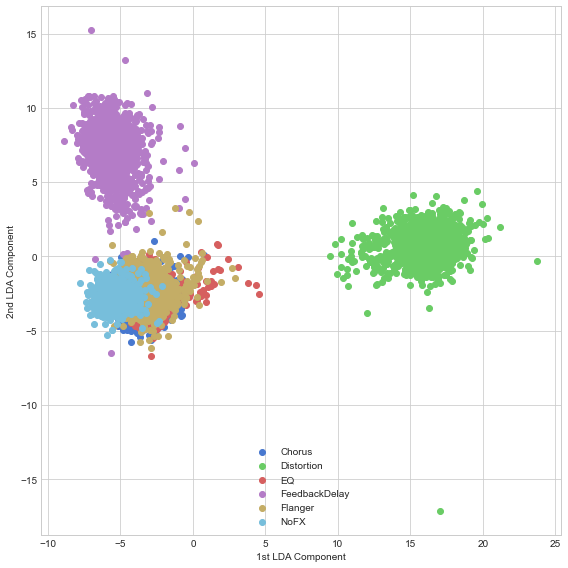

In [52]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda.fit(feat_train, lab_train)

proj_feat_train = lda.transform(feat_train)
proj_feat_test = lda.transform(feat_test)

proj_features = lda.transform(scaler.transform(features))

# with plt.style.context('seaborn-whitegrid'):
#     fig = plt.figure(figsize=(8, 8))
#     ax = fig.add_subplot(projection='3d')
#     for lab_val, lab_name in zip(range(0,len(classes)),classes):
#         ax.scatter(proj_features[labels==lab_val, 0],
#                     proj_features[labels==lab_val, 1],
#                     proj_features[labels==lab_val, 2],
#                     label=lab_name)
#     ax.set_xlabel('1st LDA Component')
#     ax.set_ylabel('2nd LDA Component')
#     ax.set_zlabel('3rd LDA Component')
#     ax.legend(loc='lower center')
#     plt.tight_layout()
#     plt.show()

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 8))
    for lab_val, lab_name in zip(range(0,len(classes)),classes):
        plt.scatter(proj_features[labels==lab_val, 0],
                    proj_features[labels==lab_val, 1],
                    label=lab_name)
    plt.xlabel('1st LDA Component')
    plt.ylabel('2nd LDA Component')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [65]:
# PCA
pca = sklearn.decomposition.PCA(n_components=20)
pca.fit(feat_train)
proj_feat_train = pca.transform(feat_train)
proj_feat_test = pca.transform(feat_test)

## SVM Classifier 

In [53]:
#Creating an instance of a SVM classifier
model_SVM = sklearn.svm.SVC(kernel='rbf', C=2.0, verbose=True)

#training the model
model_SVM.fit(proj_feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = model_SVM.predict(proj_feat_test)

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

[LibSVM]Number of mislabeled samples 142 out of 1872
Accuracy: 0.9241452991452992


              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84       407
         1.0       1.00      1.00      1.00       356
         2.0       0.92      0.91      0.91       256
         3.0       0.99      1.00      0.99       368
         4.0       0.88      0.86      0.87       369
         5.0       0.94      0.98      0.96       116

    accuracy                           0.92      1872
   macro avg       0.93      0.93      0.93      1872
weighted avg       0.92      0.92      0.92      1872



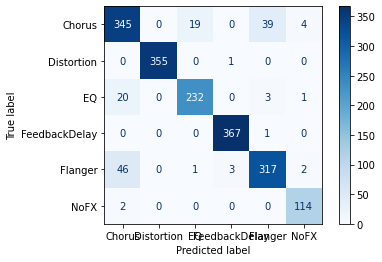

In [54]:
#computing a comprehensive set of performance metrics
print(sklearn.metrics.classification_report(lab_test, lab_predict))

disp = sklearn.metrics.plot_confusion_matrix(model_SVM, proj_feat_test, lab_test, display_labels=classes, cmap=plt.cm.Blues, normalize=None)

## ANN Classifier

### No dimensionality reduction 

Accuracy: 0.938034188034188


<IPython.core.display.Javascript object>


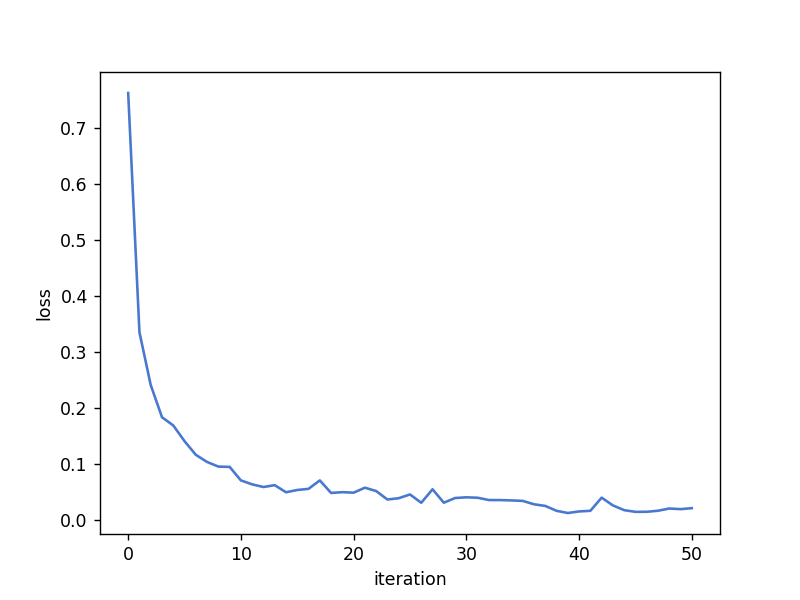

Number of mislabeled samples 116 out of 1872
Accuracy: 0.938034188034188
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       377
         1.0       1.00      1.00      1.00       391
         2.0       0.95      0.98      0.96       242
         3.0       1.00      0.96      0.98       363
         4.0       0.88      0.89      0.88       378
         5.0       0.94      0.98      0.96       121

    accuracy                           0.94      1872
   macro avg       0.94      0.94      0.94      1872
weighted avg       0.94      0.94      0.94      1872



<IPython.core.display.Javascript object>


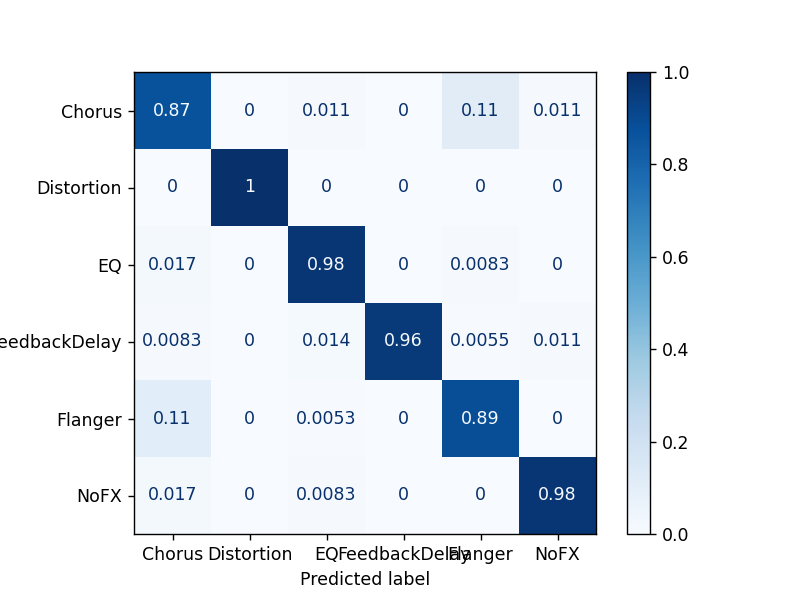

In [32]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

##Creating an instance of a MLP classifier
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPClassifier(hidden_layer_sizes=(100,50,100), max_iter=10000, activation='relu', verbose=False)

#train the model
mlp.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = mlp.predict(feat_test)
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))
disp = sklearn.metrics.plot_confusion_matrix(mlp, feat_test, lab_test, display_labels=classes, cmap=plt.cm.Blues, normalize="true")

### With dimensionality reduction

Accuracy: 0.1955128205128205


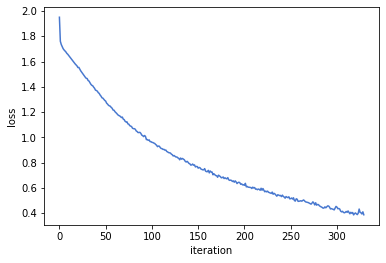

Number of mislabeled samples 1506 out of 1872
Accuracy: 0.1955128205128205
              precision    recall  f1-score   support

         0.0       0.23      0.21      0.22       377
         1.0       0.23      0.24      0.23       391
         2.0       0.12      0.10      0.11       242
         3.0       0.21      0.23      0.22       363
         4.0       0.21      0.21      0.21       378
         5.0       0.06      0.07      0.06       121

    accuracy                           0.20      1872
   macro avg       0.18      0.18      0.17      1872
weighted avg       0.20      0.20      0.19      1872



ValueError: normalize must be one of {'true', 'pred', 'all', None}

In [93]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

##Creating an instance of a MLP classifier
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPClassifier(hidden_layer_sizes=(100,50,100), max_iter=10000, activation='relu', verbose=False)

#train the model
mlp.fit(proj_feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = mlp.predict(proj_feat_test)
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))
disp = sklearn.metrics.plot_confusion_matrix(mlp, proj_feat_test, lab_test, display_labels=classes, cmap=plt.cm.Blues, normalize=None)

In [58]:
#displaying names of misclassified files
results = lab_test == lab_predict

for index, value in results.items():
    if value == False:
        print(classes[int(lab_test[index])])

Flanger
Chorus
EQ
Chorus
Chorus
Flanger
Chorus
Chorus
Chorus
Chorus
Flanger
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
EQ
Chorus
Chorus
Chorus
Flanger
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Flanger
EQ
Chorus
Chorus
EQ
EQ
Flanger
Flanger
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Flanger
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Flanger
Flanger
Chorus
Flanger
Chorus
Chorus
Flanger
Flanger
EQ
Chorus
Chorus
Flanger
Chorus
Chorus
Chorus
Flanger
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Flanger
Flanger
Chorus
Chorus
Flanger
Chorus
Chorus


# K-Fold Cross Validation

In [91]:
# Creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=1200)),
                                  ('classifier', MLPClassifier(hidden_layer_sizes=(100,50,100), max_iter=10000, activation='relu', verbose=False))
                                 ])

In [92]:
skf = sklearn.model_selection.StratifiedKFold()
scores = sklearn.model_selection.cross_validate(pipe, features, labels, cv=skf, scoring=('f1_macro', 'accuracy'), return_train_score=True)

print(scores,'\n')
print('Accuracy mean and variance', np.mean(scores['test_accuracy']),np.var(scores['test_accuracy']),'\n')
print('F1 macro mean and variance', np.mean(scores['test_f1_macro']),np.var(scores['test_f1_macro']),'\n')

{'fit_time': array([14.15738344, 14.35128856, 11.12805057, 14.81203175, 13.95379949]), 'score_time': array([0.12596726, 0.09196949, 0.10300446, 0.10396767, 0.09199834]), 'test_f1_macro': array([0.88546092, 0.91314764, 0.92597371, 0.87839753, 0.89711605]), 'train_f1_macro': array([1.      , 1.      , 0.999722, 1.      , 1.      ]), 'test_accuracy': array([0.88568376, 0.91720085, 0.92521368, 0.88942308, 0.90544872]), 'train_accuracy': array([1.        , 1.        , 0.99973291, 1.        , 1.        ])} 

Accuracy mean and variance 0.904594017094017 0.00023451767842793563 

F1 macro mean and variance 0.9000191696748564 0.0003067721797274327 



## Repeated K-Fold Cross Validation

In [85]:
# Creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                                  ('classifier', MLPClassifier(hidden_layer_sizes=(100,50,100), max_iter=10000, activation='relu', verbose=False))
                                 ])

In [86]:
rskf = sklearn.model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
scores = sklearn.model_selection.cross_validate(pipe, features, labels, cv=rskf, scoring=('f1_macro', 'accuracy'), return_train_score=True)

print(scores,'\n')
print('Accuracy mean and variance', np.mean(scores['test_accuracy']),np.var(scores['test_accuracy']),'\n')
print('F1 macro mean and variance', np.mean(scores['test_f1_macro']),np.var(scores['test_f1_macro']),'\n')

{'fit_time': array([10.2239933 , 14.08999968, 18.41248107, 13.02206707, 14.89700079,
       18.61003208, 16.40209007, 14.15699863, 20.04899693, 14.2590003 ,
       11.93099833, 17.296     , 12.86810017,  9.89000034, 15.53950214,
       10.20367599, 11.83549905, 11.54903078, 12.59503102, 12.8132503 ,
       12.79365325, 14.77900028, 11.21000004,  8.12499857, 13.50999856,
       15.50911188, 17.26399827, 19.16099811, 15.4886241 , 13.0180614 ,
       13.28530955,  9.36357808, 12.60299873, 13.77499938, 13.28499818,
       11.77075219, 22.1409986 , 18.41699839, 10.34899998, 17.5355103 ,
       16.04726267, 10.69400001, 13.05899978, 17.73396873, 12.88899112,
       12.36600065, 14.10109091, 10.56403065, 10.62603259, 13.43567681]), 'score_time': array([0.02899981, 0.03199959, 0.02699757, 0.02803111, 0.02603173,
       0.02699995, 0.0359993 , 0.03400135, 0.03400111, 0.02600002,
       0.02600169, 0.0279994 , 0.02800179, 0.0269959 , 0.02699852,
       0.03000021, 0.02699518, 0.02900052, 0.02600

## Grid search

In [82]:
# Creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
pipe = Pipeline([('scaler', StandardScaler()),
                 #('pca', PCA()),
                 ('classifier', MLPClassifier(hidden_layer_sizes=(10,5,10), max_iter=10000, activation='relu'))
                ])

rskf = sklearn.model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
grid_params = {
    'classifier__hidden_layer_sizes':[(100,30,20),(100,50,100)]
}
                                                       
grid_search = sklearn.model_selection.GridSearchCV(estimator=pipe, param_grid=grid_params, scoring='accuracy',cv=rskf,n_jobs=3)
grid_search.fit(features, labels)
                                                       
print('best set of parameters', grid_search.best_params_)
print('associated best score',grid_search.best_score_)                                                       
                                                       

best set of parameters {'classifier__hidden_layer_sizes': (100, 50, 100)}
associated best score 0.9531944444444445
